<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/Linear_Regression_for_Predicting_House_Prices/blob/master/Linear_Regression_for_Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression for Predicting House Prices**

## **Libraries**

In [28]:
import gdown
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore', category=FutureWarning)

## **Download Dataset**

In [2]:
gdown.download("https://drive.google.com/uc?id=1bAJnZWRMPuRF0yRotnLG4Nlr-pRgqWIt", "House_Prices.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bAJnZWRMPuRF0yRotnLG4Nlr-pRgqWIt
To: /content/House_Prices.csv
100%|██████████| 3.48k/3.48k [00:00<00:00, 7.97MB/s]


'House_Prices.csv'

## **Preprocessing**

### **Remove NULL Data**

In [13]:
# Load the dataset
df = pd.read_csv('House_Prices.csv')

# Display initial dataset information
print("Dataset Info:\n", df.info())
print("\nStatistical Description:\n", df.describe())

# Display the number of NULL values in each column
print("\nNumber of NULL values per column:\n", df.isna().sum())

# Replace NULL values in numerical columns with median or mode
def impute_missing_values(df):
    for column in df.columns:
        if df[column].isna().sum() > 0:  # Check for NULL values in the column
            if df[column].dtype in ['int64', 'float64']:
                df[column].fillna(int(df[column].median()), inplace=True)  # Replace with median (converted to integer)
            else:
                df[column].fillna(df[column].mode()[0], inplace=True)  # Replace with mode (for non-numeric data)
    return df

# Execute replacement
df_replace = impute_missing_values(df)

# Recheck NULL values
print("\nNumber of NULL values after replacement:\n", df_replace.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         128 non-null    int64  
 1   SqFt          126 non-null    float64
 2   Bedrooms      125 non-null    float64
 3   Bathrooms     127 non-null    float64
 4   Offers        126 non-null    float64
 5   Brick         128 non-null    object 
 6   Neighborhood  128 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 7.1+ KB
Dataset Info:
 None

Statistical Description:
                Price         SqFt    Bedrooms   Bathrooms      Offers
count     128.000000   126.000000  125.000000  127.000000  126.000000
mean   130427.343750  2001.666667    3.032000    2.448819    2.563492
std     26868.770371   212.387382    0.728852    0.514992    1.069550
min     69100.000000  1450.000000    2.000000    2.000000    1.000000
25%    111325.000000  1882.500000    3.000000    2

### **Remove Outliers**

In [14]:
# Display initial dataset statistics
print("Initial row count:", df_replace.shape[0])
print("\nInitial descriptive statistics:\n", df_replace.describe())

def remove_manual_outliers(df):
    """
    Remove outliers based on manually defined thresholds for each relevant column.
    This provides more control than automatic IQR-based removal.
    """
    clean_df = df.copy()

    # Price thresholds - remove extremely cheap or expensive houses
    clean_df = clean_df[(clean_df['Price'] >= 70000) & (clean_df['Price'] <= 200000)]

    # Square footage thresholds - remove very small or very large houses
    clean_df = clean_df[(clean_df['SqFt'] >= 1500) & (clean_df['SqFt'] <= 2500)]

    # Bedrooms threshold - remove houses with more than 4 bedrooms
    clean_df = clean_df[clean_df['Bedrooms'] <= 4]

    # Offers threshold - remove houses with more than 5 offers
    clean_df = clean_df[clean_df['Offers'] <= 5]

    return clean_df

# Apply the manual outlier removal
df_clean = remove_manual_outliers(df_replace)

# Display results after cleaning
print("\nRow count after outlier removal:", df_clean.shape[0])
print("Number of rows removed:", df.shape[0] - df_clean.shape[0])
print("\nDescriptive statistics after cleaning:\n", df_clean.describe())

# Show sample of removed outliers for inspection
outliers_removed = df_replace[~df_replace.index.isin(df_clean.index)]
print("\nSample of removed outliers:")
print(outliers_removed[['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']].head())

# Save the cleaned dataset
df_clean.to_csv('House_Prices_Manually_Cleaned.csv', index=False)
print("\nCleaned dataset saved to 'House_Prices_Manually_Cleaned.csv'")

Initial row count: 128

Initial descriptive statistics:
                Price         SqFt    Bedrooms   Bathrooms      Offers
count     128.000000   128.000000  128.000000  128.000000  128.000000
mean   130427.343750  2001.640625    3.031250    2.445312    2.570312
std     26868.770371   210.708506    0.720209    0.514492    1.062486
min     69100.000000  1450.000000    2.000000    2.000000    1.000000
25%    111325.000000  1887.500000    3.000000    2.000000    2.000000
50%    125950.000000  2000.000000    3.000000    2.000000    3.000000
75%    148250.000000  2140.000000    3.000000    3.000000    3.000000
max    211200.000000  2590.000000    5.000000    4.000000    6.000000

Row count after outlier removal: 120
Number of rows removed: 8

Descriptive statistics after cleaning:
                Price         SqFt    Bedrooms   Bathrooms      Offers
count     120.000000   120.000000  120.000000  120.000000  120.000000
mean   129585.000000  1991.500000    2.991667    2.425000    2.52500

## **Visualization**

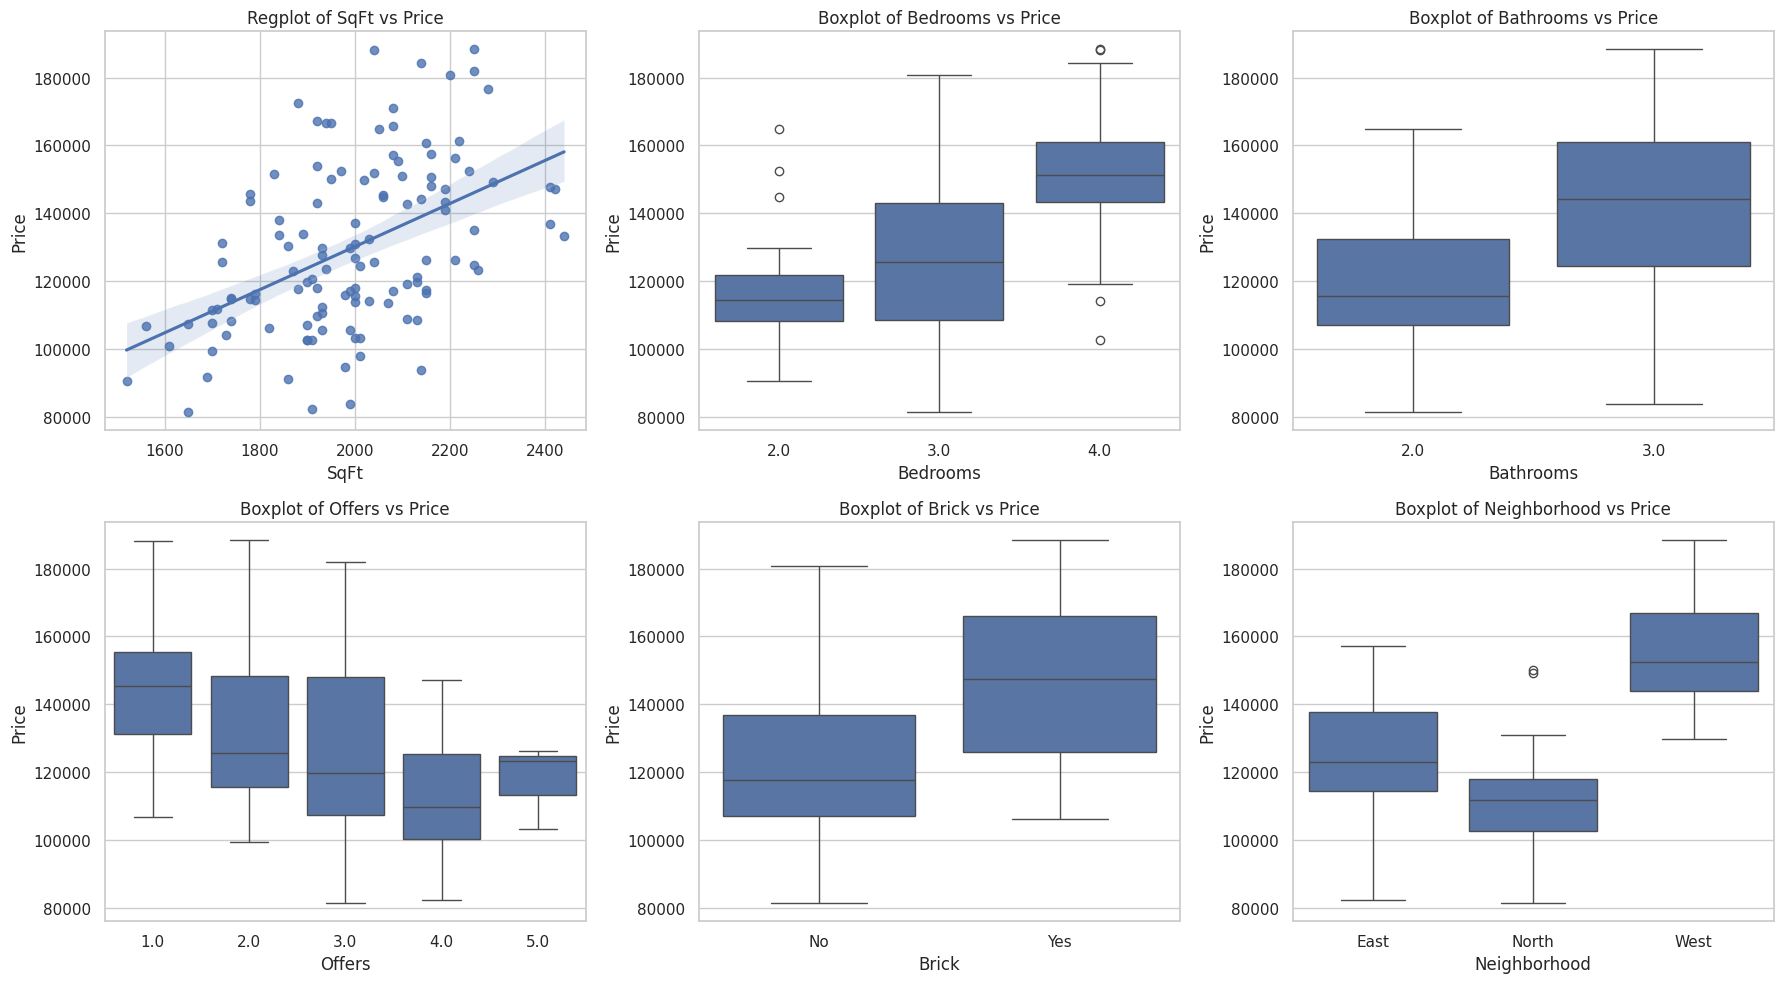

Results Analysis:
Correlation between SqFt and Price: 0.48
Average price for 2.0 bedrooms: 116696.30
Average price for 4.0 bedrooms: 151492.31
Average price for 3.0 bedrooms: 126277.61
Average price for 2.0 bathrooms: 119865.22
Average price for 3.0 bathrooms: 142735.29
Average price for 2.0 offers: 132861.11
Average price for 3.0 offers: 126546.67
Average price for 1.0 offers: 144280.95
Average price for 4.0 offers: 112673.33
Average price for 5.0 offers: 117533.33
Average price for Brick houses: Yes: 145918.42, No: 122015.85
Average price in East neighborhood: 124904.55
Average price in North neighborhood: 111617.07
Average price in West neighborhood: 156517.14


In [19]:
# Assume df_clean is already defined
# df_clean = pd.read_csv('your_data.csv')  # If data is loaded from a CSV file

# Drop null values for a clean analysis
df_clean = df_clean.dropna()

# Create a figure to display the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

## 1. Scatterplot and Regplot for SqFt
sns.regplot(x='SqFt', y='Price', data=df_clean, ax=axes[0, 0])
axes[0, 0].set_title('Regplot of SqFt vs Price')

## 2. Boxplot for Bedrooms
sns.boxplot(x='Bedrooms', y='Price', data=df_clean, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Bedrooms vs Price')

## 3. Boxplot for Bathrooms
sns.boxplot(x='Bathrooms', y='Price', data=df_clean, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Bathrooms vs Price')

## 4. Boxplot for Offers
sns.boxplot(x='Offers', y='Price', data=df_clean, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Offers vs Price')

## 5. Boxplot for Brick
sns.boxplot(x='Brick', y='Price', data=df_clean, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Brick vs Price')

## 6. Boxplot for Neighborhood
sns.boxplot(x='Neighborhood', y='Price', data=df_clean, ax=axes[1, 2])
axes[1, 2].set_title('Boxplot of Neighborhood vs Price')

# General layout adjustments
plt.tight_layout()
plt.show()

# Results analysis
print("Results Analysis:")
# Analyze SqFt
corr_sqft = df_clean['SqFt'].corr(df_clean['Price'])
print(f"Correlation between SqFt and Price: {corr_sqft:.2f}")

# Analyze Bedrooms
for bed in df_clean['Bedrooms'].unique():
    avg_price_bed = df_clean[df_clean['Bedrooms'] == bed]['Price'].mean()
    print(f"Average price for {bed} bedrooms: {avg_price_bed:.2f}")

# Analyze Bathrooms
for bath in df_clean['Bathrooms'].unique():
    avg_price_bath = df_clean[df_clean['Bathrooms'] == bath]['Price'].mean()
    print(f"Average price for {bath} bathrooms: {avg_price_bath:.2f}")

# Analyze Offers
for offers in df_clean['Offers'].unique():
    avg_price_offers = df_clean[df_clean['Offers'] == offers]['Price'].mean()
    print(f"Average price for {offers} offers: {avg_price_offers:.2f}")

# Analyze Brick
avg_price_brick_yes = df_clean[df_clean['Brick'] == 'Yes']['Price'].mean()
avg_price_brick_no = df_clean[df_clean['Brick'] == 'No']['Price'].mean()
print(f"Average price for Brick houses: Yes: {avg_price_brick_yes:.2f}, No: {avg_price_brick_no:.2f}")

# Analyze Neighborhood
for neighborhood in df_clean['Neighborhood'].unique():
    avg_price_neigh = df_clean[df_clean['Neighborhood'] == neighborhood]['Price'].mean()
    print(f"Average price in {neighborhood} neighborhood: {avg_price_neigh:.2f}")

## **Train/Test Split**

In [30]:
X = df_clean[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']]
y = df_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## **Encoding and Scaling**

In [32]:
def manual_encoding_scaling(X_train, X_test, y_train, y_test):
    """
    Manual preprocessing for regression:
    - Z-score normalization of numeric features and target using train stats
    - Manual binary encoding of 'Brick'
    - Manual one-hot encoding of 'Neighborhood'
    - Final column selection
    """

    # Copy inputs
    X_train = X_train.copy()
    X_test = X_test.copy()
    y_train = y_train.copy()
    y_test = y_test.copy()

    # Step 1: Binary encode 'Brick'
    X_train['Brick'] = X_train['Brick'].apply(lambda x: 1 if x == 'Yes' else 0)
    X_test['Brick'] = X_test['Brick'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Step 2: Manual Z-score normalization for numeric features
    numeric_cols = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
    feature_means = {}
    feature_stds = {}

    for col in numeric_cols:
        mean = X_train[col].mean()
        std = X_train[col].std()
        feature_means[col] = mean
        feature_stds[col] = std

        X_train[col] = (X_train[col] - mean) / std
        X_test[col] = (X_test[col] - mean) / std  # use train stats

    # Step 3: Manual one-hot encoding for 'Neighborhood'
    neighborhood_categories = sorted(X_train['Neighborhood'].unique())

    def one_hot_encode(df, categories):
        for cat in categories:
            df[f"Neighborhood_{cat}"] = df['Neighborhood'].apply(lambda x: 1 if x == cat else 0)
        df.drop(columns=['Neighborhood'], inplace=True)
        return df

    X_train = one_hot_encode(X_train, neighborhood_categories)
    X_test = one_hot_encode(X_test, neighborhood_categories)

    # Step 4: Ensure consistent columns between train and test
    for col in X_train.columns:
        if col not in X_test.columns:
            X_test[col] = 0
    for col in X_test.columns:
        if col not in X_train.columns:
            X_train[col] = 0

    # Ensure same column order
    X_train = X_train.sort_index(axis=1)
    X_test = X_test[X_train.columns]

    # Step 5: Final column filter
    desired_columns = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
                       'Neighborhood_East', 'Neighborhood_North', 'Neighborhood_West']
    for col in desired_columns:
        if col not in X_train.columns:
            X_train[col] = 0
            X_test[col] = 0

    X_train = X_train[desired_columns]
    X_test = X_test[desired_columns]

    # Step 6: Normalize target (y)
    y_mean = y_train.mean()
    y_std = y_train.std()
    y_train_scaled = (y_train - y_mean) / y_std
    y_test_scaled = (y_test - y_mean) / y_std  # use train stats

    # 🧾 Final Report
    print("\n✅ Manual preprocessing completed.")
    print(f"📌 X_train shape: {X_train.shape}")
    print(f"📌 X_test shape: {X_test.shape}")
    print(f"📌 y_train mean: {y_mean:.2f}, std: {y_std:.2f}")
    print(f"📌 Final columns: {list(X_train.columns)}")

    print("\n🔍 Sample of X_train (encoded & normalized):")
    print(X_train.head())

    print("\n🔍 Sample of y_train (normalized):")
    print(y_train_scaled.head())


    return X_train, X_test, y_train_scaled, y_test_scaled

X_train_final, X_test_final, y_train_scaled, y_test_scaled = manual_encoding_scaling(X_train, X_test, y_train, y_test)



✅ Manual preprocessing completed.
📌 X_train shape: (108, 8)
📌 X_test shape: (12, 8)
📌 y_train mean: 129182.41, std: 24605.27
📌 Final columns: ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood_East', 'Neighborhood_North', 'Neighborhood_West']

🔍 Sample of X_train (encoded & normalized):
         SqFt  Bedrooms  Bathrooms    Offers  Brick  Neighborhood_East  \
11  -0.628203 -1.468229  -0.857360 -0.532140      1                  1   
39  -1.299944  0.041949  -0.857360 -0.532140      0                  0   
94   0.818625  1.552128   1.155572  0.441947      1                  0   
96   2.317125  0.041949   1.155572  0.441947      0                  1   
117 -0.369841  0.041949  -0.857360 -0.532140      0                  0   

     Neighborhood_North  Neighborhood_West  
11                    0                  0  
39                    1                  0  
94                    0                  1  
96                    0                  0  
117                   1  

## **Model Implementation**

Epoch 0: Train RMSE = 0.9954, Test RMSE = 1.0020
Epoch 0: Train R² = 0.0000, Test R² = -0.0274
Epoch 100: Train RMSE = 0.5498, Test RMSE = 0.6081
Epoch 100: Train R² = 0.6948, Test R² = 0.6215
Epoch 200: Train RMSE = 0.4680, Test RMSE = 0.5290
Epoch 200: Train R² = 0.7789, Test R² = 0.7136
Epoch 300: Train RMSE = 0.4374, Test RMSE = 0.4980
Epoch 300: Train R² = 0.8069, Test R² = 0.7462
Epoch 400: Train RMSE = 0.4195, Test RMSE = 0.4826
Epoch 400: Train R² = 0.8224, Test R² = 0.7616
Epoch 500: Train RMSE = 0.4075, Test RMSE = 0.4747
Epoch 500: Train R² = 0.8324, Test R² = 0.7694
Epoch 600: Train RMSE = 0.3994, Test RMSE = 0.4708
Epoch 600: Train R² = 0.8390, Test R² = 0.7732
Epoch 700: Train RMSE = 0.3937, Test RMSE = 0.4692
Epoch 700: Train R² = 0.8435, Test R² = 0.7747
Epoch 800: Train RMSE = 0.3898, Test RMSE = 0.4688
Epoch 800: Train R² = 0.8466, Test R² = 0.7751
Epoch 900: Train RMSE = 0.3871, Test RMSE = 0.4691
Epoch 900: Train R² = 0.8488, Test R² = 0.7748

Final Train RMSE: 0.38

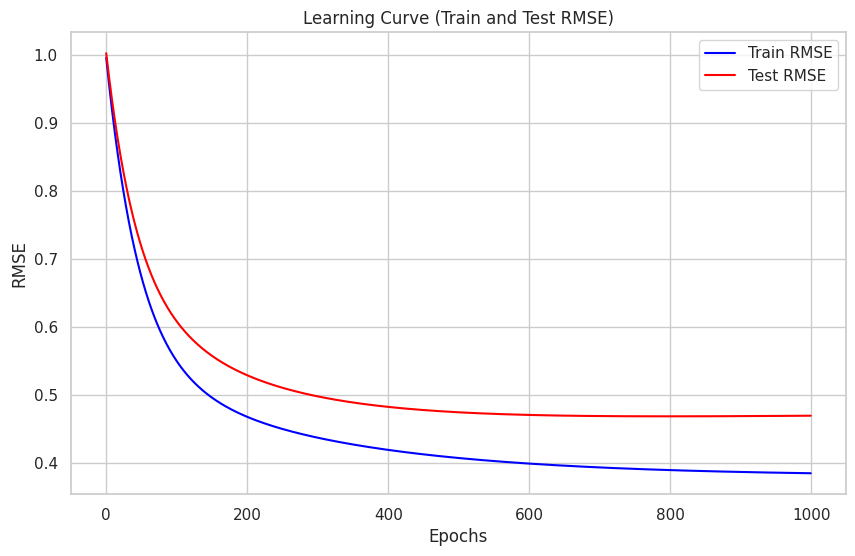

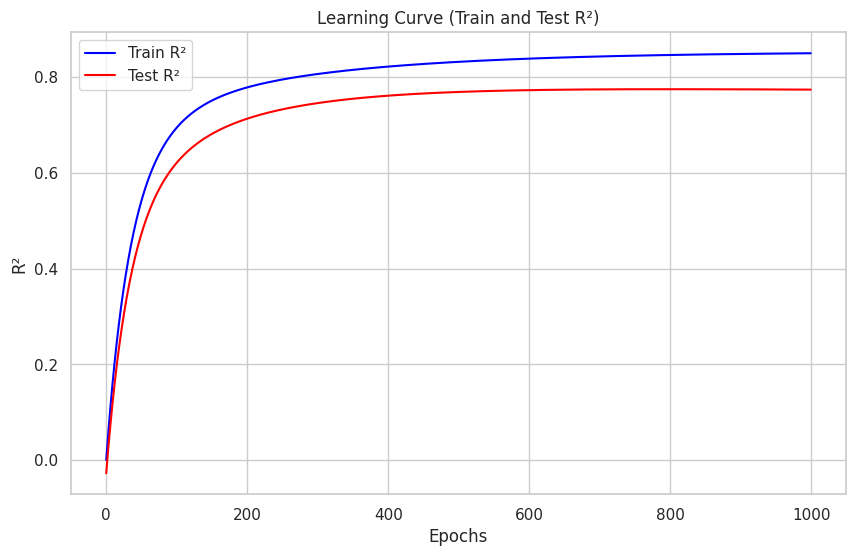

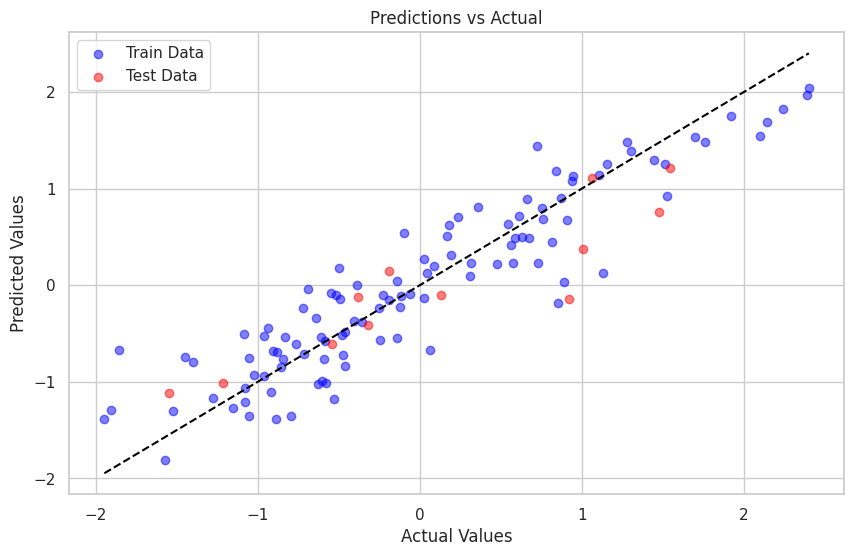

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linear_regression(X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=1000):
    """
    Linear Regression with Gradient Descent and RMSE loss function
    """
    # Step 1: Initialize weights (coefficients) and bias
    m, n = X_train.shape  # m = number of samples, n = number of features
    theta = np.zeros(n)  # weights initialization
    b = 0  # bias initialization

    # Step 2: RMSE Loss function
    def compute_rmse(y_true, y_pred):
        return np.sqrt(np.mean((y_pred - y_true) ** 2))

    # Step 3: R² (coefficient of determination) for accuracy
    def compute_r2(y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    # Variables to store RMSE and R² at each epoch
    train_rmse_list = []
    test_rmse_list = []
    train_r2_list = []
    test_r2_list = []

    # Step 4: Gradient Descent Loop
    for epoch in range(epochs):
        # Make predictions
        y_pred_train = np.dot(X_train, theta) + b
        y_pred_test = np.dot(X_test, theta) + b

        # Compute the gradient of the loss with respect to the parameters
        d_theta = -(2/m) * np.dot(X_train.T, (y_train - y_pred_train))  # Gradient for weights
        d_b = -(2/m) * np.sum(y_train - y_pred_train)  # Gradient for bias

        # Update the parameters using gradient descent
        theta -= learning_rate * d_theta
        b -= learning_rate * d_b

        # Calculate RMSE and R² for both train and test
        train_rmse = compute_rmse(y_train, y_pred_train)
        test_rmse = compute_rmse(y_test, y_pred_test)

        train_r2 = compute_r2(y_train, y_pred_train)
        test_r2 = compute_r2(y_test, y_pred_test)

        # Store RMSE and R² values for later plotting
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)

        # Print values at every 100th epoch
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")
            print(f"Epoch {epoch}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

    # Final predictions
    y_train_pred = np.dot(X_train, theta) + b
    y_test_pred = np.dot(X_test, theta) + b

    # Final RMSE and R²
    final_train_rmse = compute_rmse(y_train, y_train_pred)
    final_test_rmse = compute_rmse(y_test, y_test_pred)

    final_train_r2 = compute_r2(y_train, y_train_pred)
    final_test_r2 = compute_r2(y_test, y_test_pred)

    print(f"\nFinal Train RMSE: {final_train_rmse:.4f}")
    print(f"Final Test RMSE: {final_test_rmse:.4f}")
    print(f"Final Train R²: {final_train_r2:.4f}")
    print(f"Final Test R²: {final_test_r2:.4f}")

    # Plot Learning Curve for RMSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_rmse_list, label="Train RMSE", color="blue")
    plt.plot(range(epochs), test_rmse_list, label="Test RMSE", color="red")
    plt.title("Learning Curve (Train and Test RMSE)")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Learning Curve for R²
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_r2_list, label="Train R²", color="blue")
    plt.plot(range(epochs), test_r2_list, label="Test R²", color="red")
    plt.title("Learning Curve (Train and Test R²)")
    plt.xlabel("Epochs")
    plt.ylabel("R²")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot comparison of predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, y_train_pred, color="blue", label="Train Data", alpha=0.5)
    plt.scatter(y_test, y_test_pred, color="red", label="Test Data", alpha=0.5)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="black", linestyle="--")
    plt.title("Predictions vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()

    return theta, b, y_train_pred, y_test_pred

# Example usage:
# Assuming you already have X_train_final, X_test_final, y_train_scaled, y_test_scaled
theta, b, y_train_pred, y_test_pred = linear_regression(X_train_final, y_train_scaled, X_test_final, y_test_scaled, learning_rate=0.005, epochs=1000)


## **THE END**

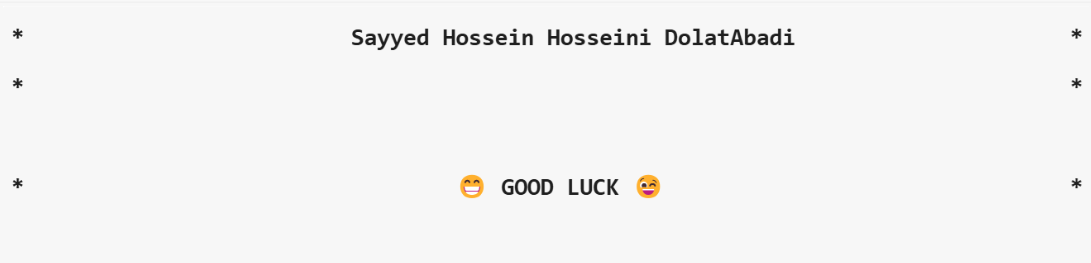